<a href="https://colab.research.google.com/github/spdkh/DataMining-Course-8118/blob/master/Parisa_Daj_COMP8118_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import os
import sys
import shutil
from google.colab import files

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform
from mlxtend.frequent_patterns import apriori, association_rules


In [387]:
# upload images
uploaded = files.upload()

Saving simple2d.dat to simple2d (2).dat


In [388]:
lines = str(list(uploaded.values())[0])[2:-1].replace('\\r', '').split('\\n')
lines

['8 2 2 3',
 '15 10 ',
 '3 10 ',
 '15 12 ',
 '3 14 ',
 '18 13 ',
 '1 7 ',
 '10 1 ',
 '10 30']

In [400]:
data = [line.split() for line in lines]
x = np.array(data[1:], dtype=float)
x.T

array([[15.,  3., 15.,  3., 18.,  1., 10., 10.],
       [10., 10., 12., 14., 13.,  7.,  1., 30.]])

In [401]:
def spdkh_kmeans(x, k, centroid, stop_when_no_change=False):
    print('Initial Centroid:')
    print(centroid)
    print()

    x = x.T
    old_centroid = np.zeros((k, 2))
    i = 1
    while i <= 20:
        if (np.array([centroid == old_centroid])).all():
            if stop_when_no_change:
                break
        
        print('\n' + '\t' * 3 + '#' * 25)
        print('\t' * 4 + "Iteration", i)
        i += 1
        print('\t' * 3 + '#' * 25)
        print()

        c_dist = np.zeros((k, np.shape(x)[0], 1))
        clusters = [0] * k
        
        empty_ids = []
        plt.scatter(x.T[0], x.T[1], color="black")
        
        for c in range(k):
            plt.plot(centroid[c][0], centroid[c][1], marker="o", markersize=15, markeredgecolor="red")
            c_dist[c] = cdist(x, [centroid[c]], metric='euclidean')
            # print("\nDistance of x with centroid", c + 1)
            # print(c_dist[c])
        # print()
        c_ids = np.argpartition(c_dist.T, k - 1).T
        old_centroid = centroid.copy()
        sses = [0] * k
        for c in range(k):
            
            condition = np.squeeze(c_ids[c] == 0)
            clusters[c] = np.array(x[condition].tolist())
            
            print('Cluster', c)
            print(clusters[c].T)
            print()

            if clusters[c] != []:
                plt.scatter(clusters[c].T[0], clusters[c].T[1])
            else:
                empty_ids.append(c)
                continue
                
            centroid[c] = np.mean(clusters[c], 0)   
            errors = cdist(clusters[c], [centroid[c]], metric='euclidean')
            # print('errors', errors)
            sses[c] = list(sum([error ** 2 for error in errors]))

        k -= len(empty_ids)

        centroid = np.delete(centroid, [empty_ids], axis=0)
        
        plt.grid(True)
        if np.shape(x)[1] != 2:
            plt.close()
        else: 
            plt.show()

        print("\nUpdated centroid")
        print(centroid)
    
    return sses
 

In [402]:
def spdkh_c2(data):
    n, m, k_min, k_max = list(map(int, data[0]))
    print('n, m, k min, k max:', n, m, k_min, k_max)

    x = np.array(data[1:], dtype=float)
    print('\ninput data points:\n', x.T)

    plt.scatter(x.T[0], x.T[1], color="black")
    plt.grid(True)
    if m != 2:
        plt.close()
    else:
        plt.show()

    sse = dict()
    if m <= 3:
        x_new = x
    else:
        x_new = select_subspace(x)
    for k in range(k_min, k_max + 1):
        print('\n' + '_' * 70)
        print()
        print('\t' * 4 + 'K =', k)
        print('_' * 70)
        print()

        centroid_ids = np.random.choice(n, k, replace=False)
        centroids = x[centroid_ids]
        sse[k] = spdkh_kmeans(x_new.T, k, centroids)
    print("SSE:", sse)
    return sse


In [403]:
def generate_output(SSE):
    for k, sses in SSE.items(): 
        print(k, end=' ')
        for sse in sses:
            print(np.round(sse[0], 4), end=' ')
        print()

n, m, k min, k max: 8 2 2 3

input data points:
 [[15.  3. 15.  3. 18.  1. 10. 10.]
 [10. 10. 12. 14. 13.  7.  1. 30.]]


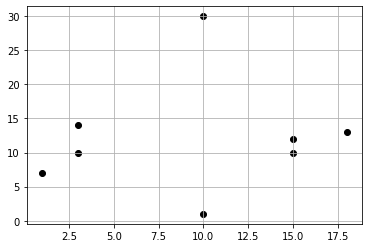


______________________________________________________________________

				K = 2
______________________________________________________________________

Initial Centroid:
[[15. 12.]
 [ 3. 10.]]


			#########################
				Iteration 1
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


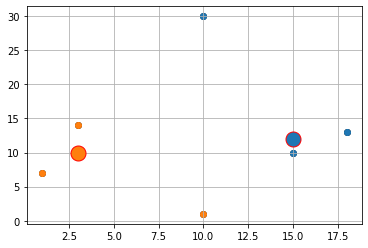


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 2
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



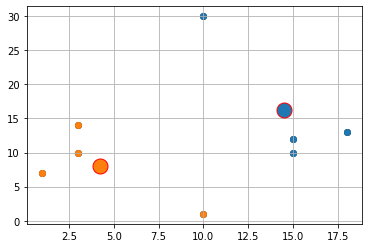


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 3
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



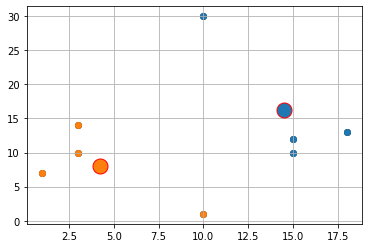


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 4
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



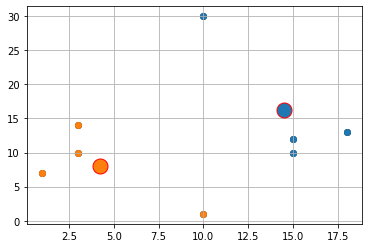


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 5
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



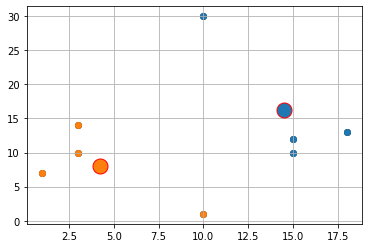


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 6
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



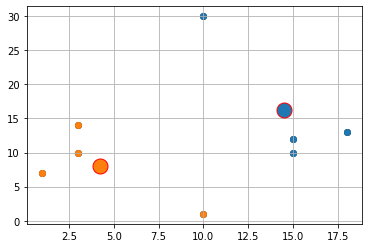


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 7
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



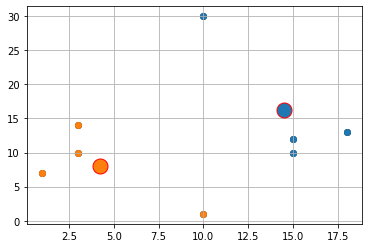


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 8
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



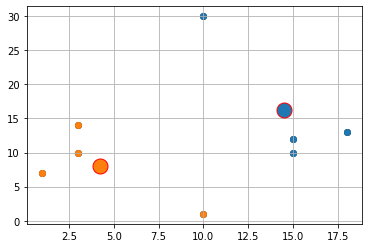


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 9
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



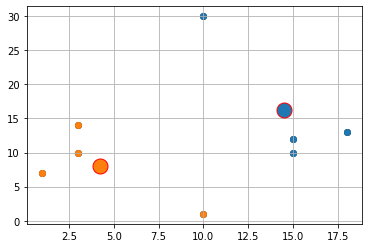


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 10
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



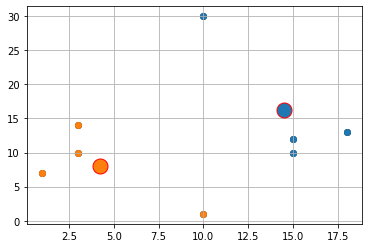


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 11
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



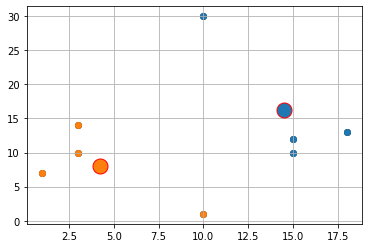


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 12
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



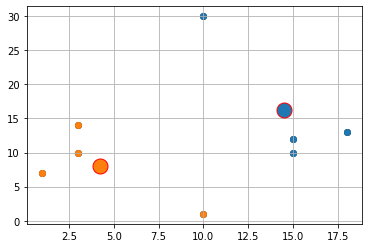


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 13
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



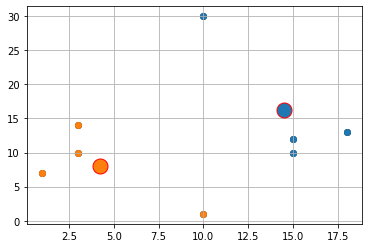


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 14
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



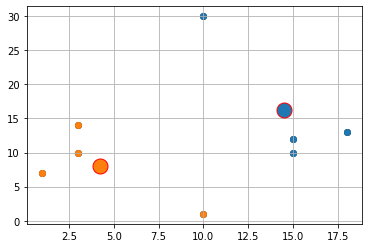


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 15
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



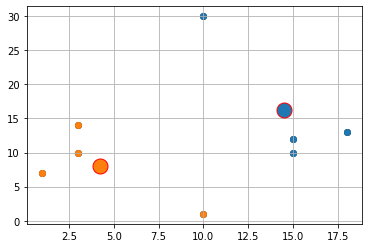


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 16
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



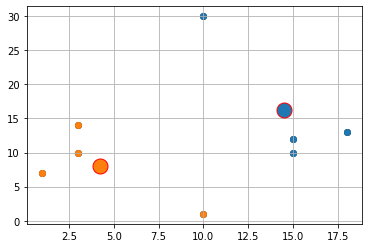


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 17
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



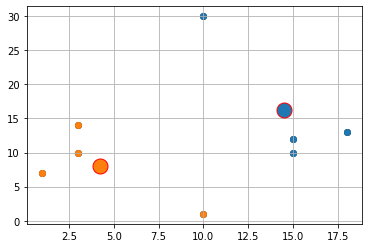


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 18
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



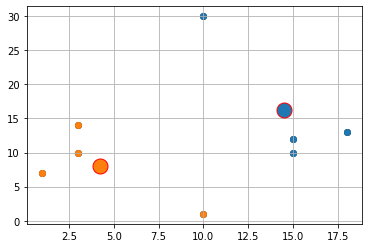


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 19
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



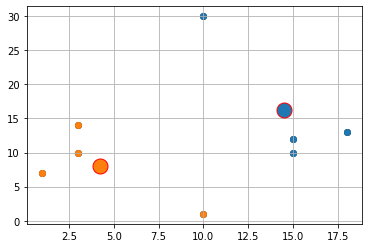


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

			#########################
				Iteration 20
			#########################

Cluster 0
[[15. 15. 18. 10.]
 [10. 12. 13. 30.]]

Cluster 1
[[ 3.  3.  1. 10.]
 [10. 14.  7.  1.]]



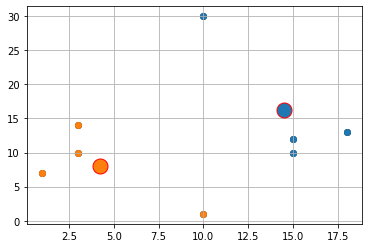


Updated centroid
[[14.5  16.25]
 [ 4.25  8.  ]]

______________________________________________________________________

				K = 3
______________________________________________________________________

Initial Centroid:
[[ 3. 14.]
 [ 1.  7.]
 [15. 12.]]


			#########################
				Iteration 1
			#########################

Cluster 0
[[ 3. 10.]
 [14. 30.]]

Cluster 1
[[15.  3. 15. 18.  1.]
 [10. 10. 12. 13.  7.]]

Cluster 2
[[10.]
 [ 1.]]



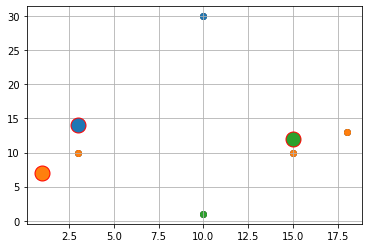


Updated centroid
[[ 6.5 22. ]
 [10.4 10.4]
 [10.   1. ]]

			#########################
				Iteration 2
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[ 3.]
 [14.]]

Cluster 2
[[15.  3. 15. 18.  1. 10.]
 [10. 10. 12. 13.  7.  1.]]



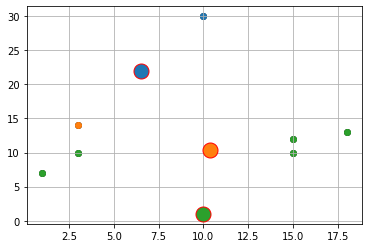


Updated centroid
[[10.         30.        ]
 [ 3.         14.        ]
 [10.33333333  8.83333333]]

			#########################
				Iteration 3
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[]

Cluster 2
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


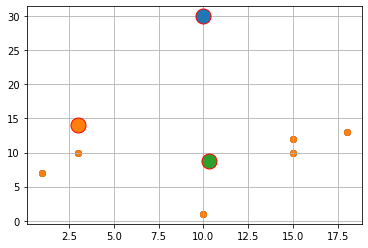


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 4
			#########################



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



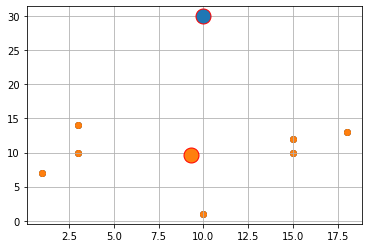


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 5
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



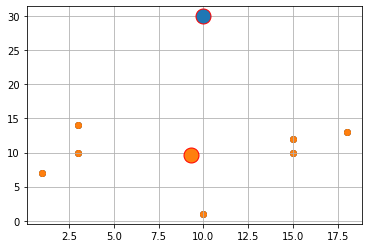


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 6
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



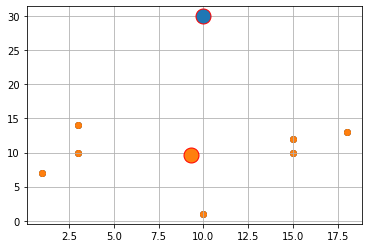


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 7
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



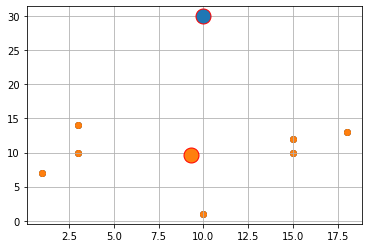


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 8
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



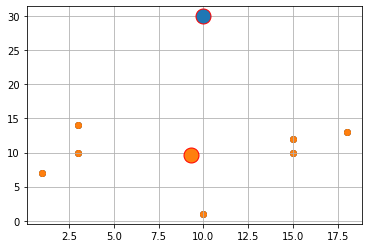


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 9
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



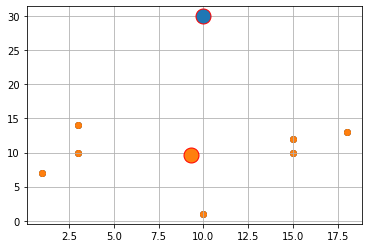


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 10
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



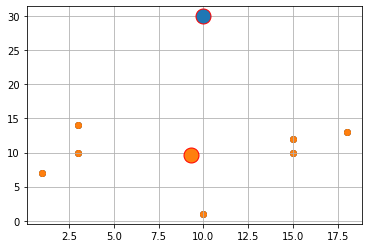


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 11
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



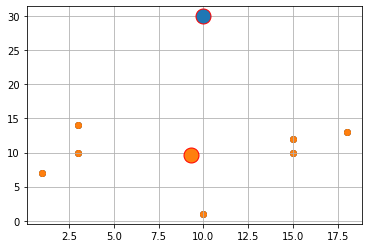


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 12
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



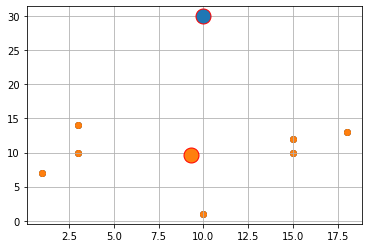


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 13
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



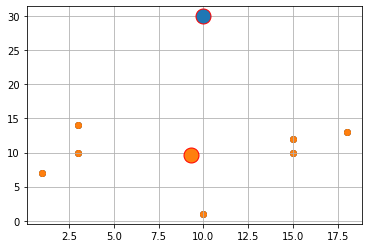


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 14
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



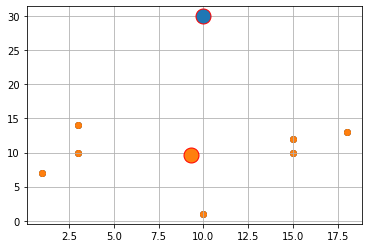


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 15
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



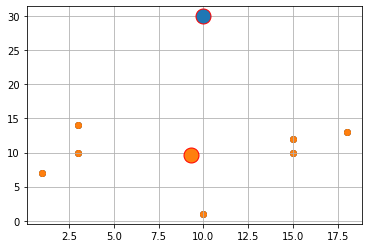


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 16
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



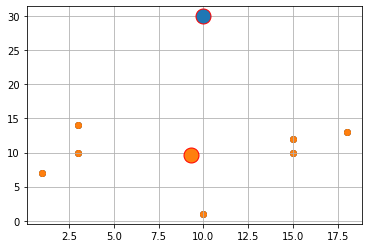


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 17
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



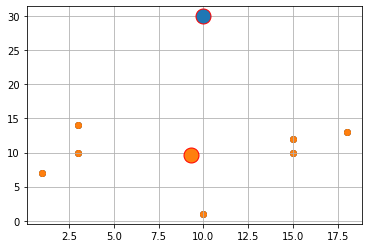


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 18
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



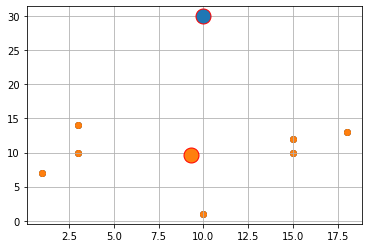


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 19
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



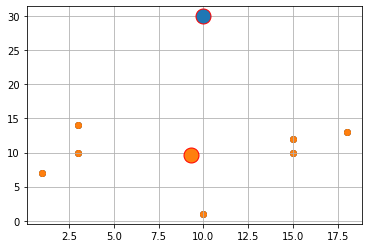


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]

			#########################
				Iteration 20
			#########################

Cluster 0
[[10.]
 [30.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10.]
 [10. 10. 12. 14. 13.  7.  1.]]



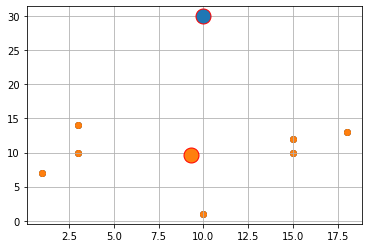


Updated centroid
[[10.         30.        ]
 [ 9.28571429  9.57142857]]
SSE: {2: [[289.75], [136.75]], 3: [[0.0], [407.1428571428571]]}


In [404]:
SSE = spdkh_c2(data)

In [405]:
generate_output(SSE)

2 289.75 136.75 
3 0.0 407.1429 


In [406]:
stdoutOrigin=sys.stdout 
sys.stdout = open("test.res", "w")
generate_output(SSE)
sys.stdout.close()
sys.stdout = stdoutOrigin


In [423]:
def select_subspace(x, m=2, n=8):
    max_x = np.max(x, 0)
    min_x = np.min(x, 0)
    range_x = max_x - min_x
    delta = 0.1 * range_x
    print(delta)
    grid = np.empty((10, m, n))
    for grid_id in range(10):
        # print('Grid:', grid_id)
        high = (grid_id + 1) * delta
        low = grid_id * delta
       
        for dim in range(m):
            grid[grid_id, dim, :] = (x[:, dim] < high[dim]) * (x[:, dim] > low[dim])
        # print(grid)
    reg_cnt = grid
    print(reg_cnt)
    # frq_items = apriori(pd.DataFrame(reg_cnt), min_support = 0.2)
    # print(frq_items)
    return x
    

In [424]:
select_subspace(x)

[1.7 2.9]
[[[0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]]

 [[0. 1. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 1. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]


array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0.]])

In [310]:
dim = 0
high = 3.4
low = 1.7
# np.all((x[:, dim] < high) * (x[:, dim] > low), axis=0)
np.count_nonzero(x[:, dim] < high) * (x[:, dim] > low)

array([3, 3, 3, 3, 3, 0, 3, 3])

In [409]:
(x[:, dim] < high) * (x[:, dim] > low)

array([False,  True, False,  True, False, False, False, False])

In [301]:
(x[:, dim] > low)

array([ True,  True,  True,  True,  True, False,  True,  True])